<a href="https://colab.research.google.com/github/saivenkatreddy29/Implementation-of-Hands-on-Large-Language-models-book/blob/main/Jaylamar_book_chapter_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.3 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset

In [ ]:
data = load_dataset("maartengr/arxiv_nlp")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/617 [00:00<?, ?B/s]

data.csv:   0%|          | 0.00/53.2M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
abstracts = data['train']['Abstracts']
titles = data['train']['Titles']

In [ ]:
len(titles)

44949

In [ ]:
!pip install sentence_transformers -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.2/255.2 kB 17.7 MB/s eta 0:00:00


In [ ]:
from sentence_transformers import SentenceTransformer

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
embedding_model = SentenceTransformer("thenlper/gte-small")
embeddings = embedding_model.encode(abstracts, show_progress_bar= True)

modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/68.1k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/66.7M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1405 [00:00<?, ?it/s]

In [ ]:
embeddings.shape

(44949, 384)

In [ ]:
!pip install umap-learn -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.2 MB/s eta 0:00:00


In [ ]:
# import umap

In [ ]:
!pip install umap-learn

In [ ]:
from umap.umap_ import UMAP

In [ ]:
  u_map_model = UMAP(n_components= 5,min_dist = 0.0,  metric = 'cosine', random_state = 42)

  reduced_embeddings = u_map_model.fit_transform(embeddings)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [ ]:
reduced_embeddings.shape

(44949, 5)

In [ ]:
!pip install hdbscan -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 44.1 MB/s eta 0:00:00


In [ ]:
from hdbscan import HDBSCAN

hdbscan_model = HDBSCAN(min_cluster_size = 50,
                        metric = 'euclidean',
                        cluster_selection_method = 'eom')

hdbscan_model.fit(reduced_embeddings)

HDBSCAN(min_cluster_size=50)

In [ ]:
len(set(hdbscan_model.labels_))

148

In [ ]:
clusters = hdbscan_model.labels_

In [ ]:
# clusters

In [ ]:
clusters[:10]

array([ -1,  -1,  -1, 112,  -1,  98,  98,  -1, 133,  -1])

In [ ]:
import numpy as np

# Print first three documents in cluster 0
cluster = 0
for index in np.where(clusters == cluster)[0][:3]:
  print(abstracts[index][:300] + '...\n')


  This works aims to design a statistical machine translation from English text
to American Sign Language (ASL). The system is based on Moses tool with some
modifications and the results are synthesized through a 3D avatar for
interpretation. First, we translate the input text to gloss, a written fo...

  Researches on signed languages still strongly dissociate lin- guistic issues
related on phonological and phonetic aspects, and gesture studies for
recognition and synthesis purposes. This paper focuses on the imbrication of
motion and meaning for the analysis, synthesis and evaluation of sign lang...

  Modern computational linguistic software cannot produce important aspects of
sign language translation. Using some researches we deduce that the majority of
automatic sign language translation systems ignore many aspects when they
generate animation; therefore the interpretation lost the truth inf...



We will only have two cluster to visualize

In [ ]:
import pandas as pd

reduced_embeddings = UMAP(n_components = 2, min_dist = 0.0, metric = 'cosine', random_state = 42).fit_transform(embeddings)


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [ ]:
df = pd.DataFrame(reduced_embeddings, columns = ['x', 'y'])
df['title'] = titles
df['clusters'] = [str(c) for c in clusters]


In [ ]:
df.head(10)

,x,y,title,clusters
0,5.241489,10.468601,Introduction to Arabic Speech Recognition Usin...,-1
1,5.266506,10.491050,Arabic Speech Recognition System using CMU-Sph...,-1
2,4.591829,10.818470,On the Development of Text Input Method - Less...,-1
3,0.072643,10.701838,Network statistics on early English Syntax: St...,112
4,4.555691,8.183445,Segmentation and Context of Literary and Music...,-1
5,3.595971,9.797411,International Standard for a Linguistic Annota...,98
6,3.541084,9.720738,A Formal Model of Dictionary Structure and Con...,98
7,-0.983995,11.210353,Practical Approach to Knowledge-based Question...,-1
8,3.335813,8.904849,Learning Probabilistic Models of Word Sense Di...,133
9,0.033125,11.031086,Learning Phonotactics Using ILP,-1


In [ ]:
to_plot = df.loc[df['clusters'] != -1,:]
outliers = df.loc[df['clusters'] != -1,:]


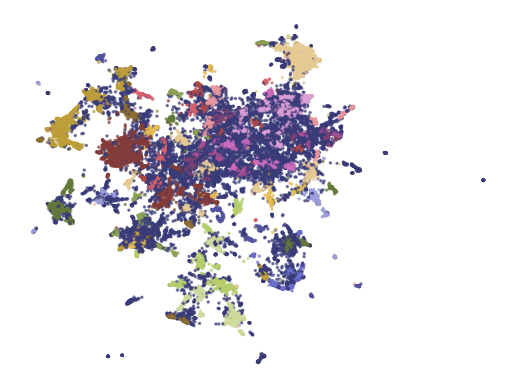

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(outliers.x, outliers.y, alpha = 0.05, s =2, c = 'grey')
plt.scatter(to_plot.x, to_plot.y, s = 2, c = to_plot.clusters.astype(int), alpha = 0.6, cmap = 'tab20b')
plt.axis(False);

# Book code

(-7.784396243095398,
 11.759053778648376,
 -0.7459853870794177,
 16.086435334943236)

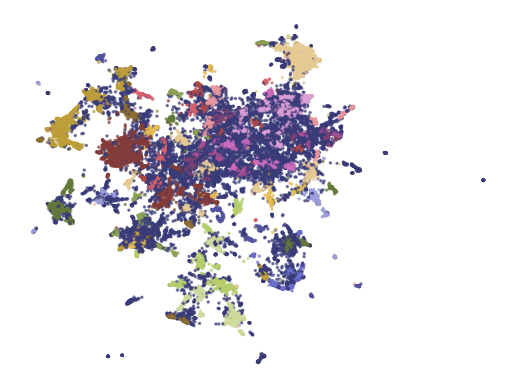

In [ ]:
# Plot outliers and non-outliers separately
plt.scatter(outliers.x, outliers.y, alpha=0.05, s=2, c="grey")
plt.scatter(
 df.x, df.y, c=df.clusters.astype(int),
 alpha=0.6, s=2, cmap="tab20b"
)
plt.axis("off");